# Grade: /100 points

# Lab Assignment 01: Supervised learning, Linear models, and Loss functions

In this Lab assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [ ]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files
uploaded = files.upload()
%matplotlib inline

Saving possum.csv to possum.csv



## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

In [1]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')
#alphas=np.linspace(0.1,1,10)
# Make the scatter plot (don't forget the axis labels)
possum_data.plot(x='age',y='tailL', kind='scatter', alpha=0.5)
plt.title('Tail length vs. Age')
plt.xlabel('$age$', fontsize=18)
plt.ylabel('$tail Length$', fontsize=18)
plt.show()

NameError: ignored

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call you function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [ ]:
def linearModelPredict(b,X):
    yp = np.dot(X,b)
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print("One dimensional matrix for b: \n ",linearModelPredict(b,X))
# The dimesnionality of yp is 1 since b is a 1d-array
# By the way: What happens when b is a 2d-array? 
# If b is a 2d-array, yp would be also be a 2d array
X2= np.array([[1,0],[1,-1],[1,2]])
b2 = np.array([[0.1,0.3],[0.2,0.1]])
print("Two dimensional matrix for b: \n", linearModelPredict(b2,X2))

One dimensional matrix for b: 
  [ 0.1 -0.2  0.7]
Two dimensional matrix for b: 
 [[ 0.1  0.3]
 [-0.1  0.2]
 [ 0.5  0.5]]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 
Written answer: To minimize the cost do you need increase or decrease the value of the parameters? 

In [ ]:
def linearModelLossRSS(beta,X,y):
  #Get model prediction
  predY=linearModelPredict(beta,X)
  #Get vector of residuals
  res=np.subtract(y,predY)
  #Get residuals sum of square
  rss=np.sum(res**2)
  #Get the gradient
  gradient=-2*(np.dot(res,X))
  return (rss,gradient)
  #return (rss,gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

print("RSS and Gradient\n",linearModelLossRSS(b,X,y))

RSS and Gradient
 (2.06, array([-3.6, -4. ]))


Written answer: To minimize the cost, we need to decrease the value since the gradient came back as negative.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2. 


In [ ]:
def linearModelFit(X,y,lossfcn=linearModelLossRSS):
  rows,cols=X.shape
  betas=np.zeros((cols,1))
  RES=so.minimize(lossfcn,betas,args=(X,y),jac=True)
  estimated_betas=RES.x
  res=y-np.mean(y)
  TSS=sum(res**2)
  RSS,deriv=linearModelLossRSS(estimated_betas,X,y)
  R2=1-RSS/TSS
  return (estimated_betas,R2)


X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

print("Best parameter and the R2 value:\n",linearModelFit(X,y) )

Best parameter and the R2 value:
 (array([0.6, 0.6]), 0.75)


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. 



R2: 0.2228658794760412


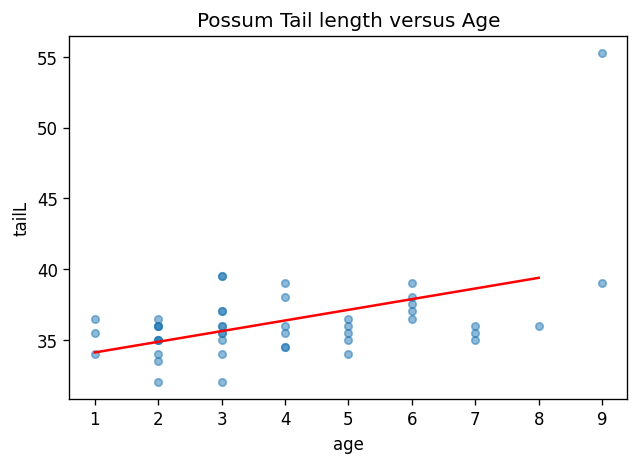

In [ ]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]
fig, ax = plt.subplots(dpi = 120)
y=possum_data.tailL.values
age = possum_data.age.values
N= age.size
x=np.c_[np.ones(N),age]
# Call you fitting function 
real_betas, real_R2= linearModelFit(x,y)
# Create the scatter plot (see question 1.1)
possum_data.plot.scatter(x='age',y='tailL',alpha=0.5,ax=ax)
plt.title('Possum Tail length versus Age')

# Create a new X matrix with equally space data 
age_grid=np.arange(age.min(),age.max())
Xn=np.c_[np.ones(age_grid.size),age_grid]
yn=Xn@real_betas
# Add the line to the graph 
ax.plot(age_grid,yn,color='red')
# Report R2 
print("R2:",real_R2)
#real_betas

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 

In [ ]:
def linearModelLossLAD(b,X,y):
    predY = linearModelPredict(b,X)
    sres = np.sign(y-predY); 
    sum_abs_dev = sum(abs(y-predY))
    grad =- (sres @ X)
    return (sum_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
print("RSS and Gradient:\n",linearModelLossLAD(b,X,y))

RSS and Gradient:
 (2.0, array([-1., -1.]))


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, the code below will plot the fit.  The code will also print the R squared value on the plot.

Written answer: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



R2: 0.12923024435209518


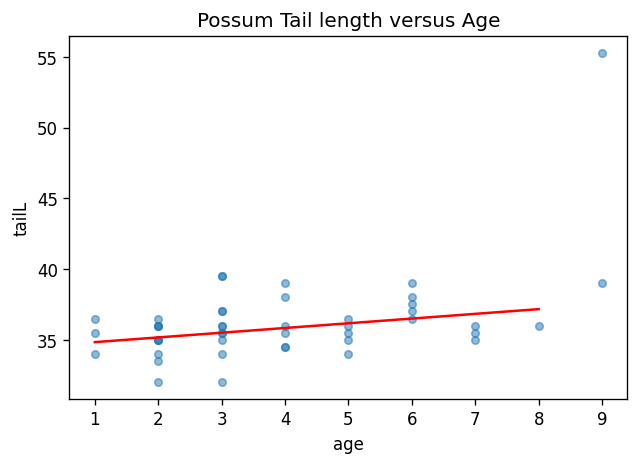

In [ ]:
y = possum_data.tailL.values
age = possum_data.age.values
X = np.c_[np.ones(age.size), age]
actual_betas, actual_R2 = linearModelFit(X,y, lossfcn = linearModelLossLAD)

age_grid = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = Xn@actual_betas

fig, ax = plt.subplots(dpi = 120)
plt.title('Possum Tail length versus Age')
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.5,
                         ax = ax)

ax.plot(age_grid, yn, color = 'red')
#actual_betas
print("R2:",actual_R2)


Written Answer:
The fit from LAD has a b0 of 34.5 and a b1 of 0.3333.

The fit from OLS has a b0 of 33.35 and a b1 of 0.754.

The R2 from OLS is 0.2228 and LAD is 0.1292 which makes OLS a better fit for the data since the R2 value is larger.

The slope of the OLS fit is at least two times larger then LAD and 
this can be linked with the outlier within the possum_data
since the L1 method are more robust to outliers


### Question 2.3: /15 points

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

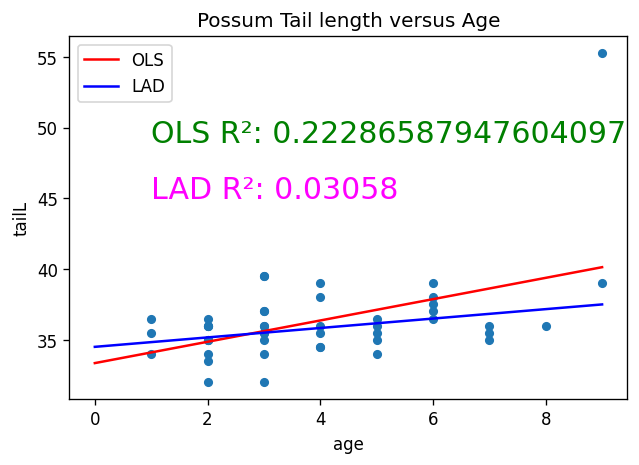

In [ ]:
ols_fit = smf.ols('tailL~age', data = possum_data).fit()
lad_fit = smf.quantreg('tailL~age', data = possum_data).fit(q = 0.5)
lad_R2= float('0.'+lad_fit.summary().as_csv().split('Pseudo R-squared')[1].split('Model')[0].split('.')[1])
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y ='tailL', ax = ax)
plt.title('Possum Tail length versus Age')

age = np.linspace(0,9,100)
y_ols = ols_fit.predict(exog = dict(age = age)).values
y_lad = lad_fit.predict(exog = dict(age = age)).values

ax.plot(age, y_ols, color = 'red', label = 'OLS')
ax.plot(age, y_lad, color = 'blue', label = 'LAD')
ax.text(1, 49, f"OLS R²: {ols_fit.rsquared}",fontsize=18, color="green")
ax.text(1, 45, f"LAD R²: {lad_R2}",fontsize=18, color="magenta")
ax.legend()


Written Answer: The OLS squared value is very similar to the one from Q1.5
The LAD squared value is not close to Q2.3 but it isn't far off either